# Car Price prediction 


In [1]:
import pandas as pd
import numpy as np

In [2]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!pip install wget

In [4]:
import wget

In [5]:
wget.download(data)  ##!wget $data        # to download the data from web

100% [..........................................................................] 1475504 / 1475504

'data (3).csv'

In [6]:
df=pd.read_csv(data)

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


make all columns small letter and replace space with _

In [8]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
for col in df.columns:
    
    print(col,df[col].nunique())
    print(df[col].unique()[:])

make 48
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
model 915
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scagliet

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

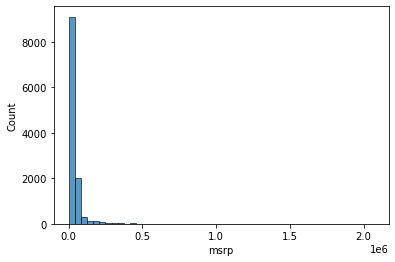

In [13]:
sns.histplot(df.msrp,bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

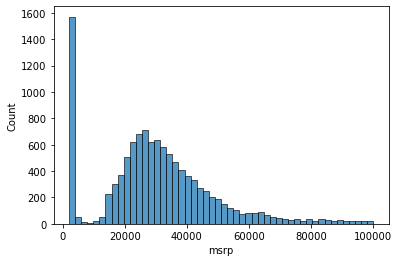

In [14]:
sns.histplot(df.msrp[df['msrp']<100000],bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

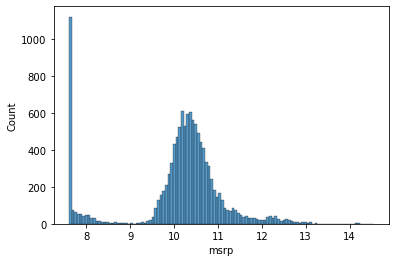

In [15]:
price_log=np.log(df.msrp)
sns.histplot(price_log)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
n=len(df)

In [18]:
n_val=int(n*.2)
n_test=int(n*.2)
n_train=n-(n_val+n_test)
n,n_train,n_val,n_test

(11914, 7150, 2382, 2382)

In [19]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [20]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [21]:
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_val+n_train]]
df_test=df.iloc[idx[n_val+n_train:]]
len(df_train),len(df_val), len(df_test)

(7150, 2382, 2382)

In [22]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
6720,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
5878,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
11190,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4554,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


In [23]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


In [24]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [25]:
len(y_train),len(y_val),len(y_test)

(7150, 2382, 2382)

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [27]:
x=np.array([[310,4,2],
   [193,6,4],
   [180,4,4]])
y=np.array([10.22,10.12,10.33])

In [28]:
def liner_reggression(X,y):
    ones=np.ones((X.shape[0]))
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    W=XTX_inv.dot(X.T).dot(y)
    return W[0],W[1:]
    

In [29]:
liner_reggression(x,y)

(0.0, array([-0.0790625, -0.11125  , -5.005    ]))

In [30]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [31]:
base=['engine_hp',
       'engine_cylinders',  
       'highway_mpg', 'city_mpg', 'popularity']

In [32]:
def prepare_df(df,bas):
    df_num=df[bas]
    df_num=df_num.fillna(0)
    return df_num.values

X_train=prepare_df(df_train,base)

In [33]:
w0,w=liner_reggression(X_train,y_train)

In [34]:
y_perdictios=w0+X_train.dot(w)

<AxesSubplot:ylabel='Count'>

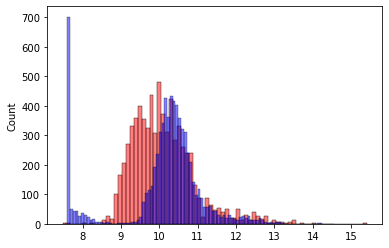

In [35]:
sns.histplot(y_perdictios, alpha=.5,color='red')
sns.histplot(y_train, alpha=.5,color='blue')

In [36]:
def MRSE(y,y_pred):
    se=(y-y_pred)**2
    se_mean=se.mean()
    return np.sqrt(se_mean)

In [37]:
MRSE(y_train,y_perdictios)

0.7554192603920132

In [38]:
X_val=prepare_df(df_val,base)
w0,w=liner_reggression(X_val,y_val)
y_perdictios=w0+X_val.dot(w)
MRSE(y_val,y_perdictios)

0.7510033473915448

# Adding new features (age)

In [39]:
def prepare_df(df,bas):
    df=df.copy()
    df['age']=2017-df['year']
    features= bas+['age']
    df_num=df[features]
    df_num=df_num.fillna(0)
    return df_num.values

X_train=prepare_df(df_train,base)
w0,w=liner_reggression(X_train,y_train)
y_perdictios=w0+X_train.dot(w)
MRSE(y_train,y_perdictios)

0.5175055465840046

In [40]:
X_val=prepare_df(df_val,base)
w0,w=liner_reggression(X_val,y_val)
y_perdictios=w0+X_val.dot(w)
MRSE(y_val,y_perdictios)

0.5153170774003943

<AxesSubplot:ylabel='Count'>

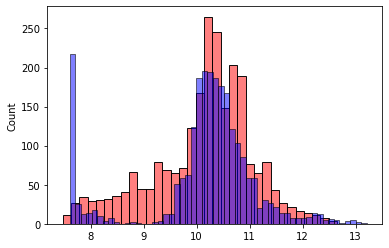

In [41]:
sns.histplot(y_perdictios, alpha=.5,color='red')
sns.histplot(y_val, alpha=.5,color='blue')

#  catagorial data 

In [54]:
catago_data=list(df.columns[df.dtypes=='object'])

catago_data

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [96]:
cat_dic={}

for i in catago_data:
    cat_dic[i]=list(df[i].value_counts().head(10).index)
cat_dic

{'make': ['Chevrolet',
  'Ford',
  'Volkswagen',
  'Toyota',
  'Dodge',
  'Nissan',
  'GMC',
  'Honda',
  'Mazda',
  'Cadillac'],
 'model': ['Silverado 1500',
  'Tundra',
  'F-150',
  'Sierra 1500',
  'Beetle Convertible',
  'Tacoma',
  'GTI',
  'Frontier',
  'Accord',
  'Beetle'],
 'engine_fuel_type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/E85)',
  'diesel',
  'electric',
  'flex-fuel (premium unleaded required/E85)',
  'flex-fuel (premium unleaded recommended/E85)',
  'flex-fuel (unleaded/natural gas)',
  'natural gas'],
 'transmission_type': ['AUTOMATIC',
  'MANUAL',
  'AUTOMATED_MANUAL',
  'DIRECT_DRIVE',
  'UNKNOWN'],
 'driven_wheels': ['front wheel drive',
  'rear wheel drive',
  'all wheel drive',
  'four wheel drive'],
 'market_category': ['Crossover',
  'Flex Fuel',
  'Luxury',
  'Luxury,Performance',
  'Hatchback',
  'Performance',
  'Crossover,Luxury',
  'Luxury,High-Performance',
  'Exotic,High-Perfor

In [97]:
def prepare_df_full(df,bas):
    df=df.copy()
    df['age']=2017-df['year']
    features= bas+['age']
    
    for c,value in cat_dic.items():
        for v in value:
            df['%s_%s' % (c,v)]=(df[c]==v).astype(int)
            features.append('%s_%s' % (c,v))
    
    df_num=df[features]
    df_num=df_num.fillna(0)
    return df_num.values

In [98]:
def liner_reggression_reg(X,y,r=.001):
    ones=np.ones((X.shape[0]))
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    W=XTX_inv.dot(X.T).dot(y)
    return W[0],W[1:]

In [99]:
X_train=prepare_df_full(df_train,base)
w0,w=liner_reggression_reg(X_train,y_train)
y_perdictios=w0+X_train.dot(w)
MRSE(y_train,y_perdictios)

0.4420255784919716

#model tuning with different r

In [105]:
X_val=prepare_df_full(df_val,base)
for i in [.1,.01,.001,.0001,.00001,.0000000000000000001]:
    w0,w=liner_reggression_reg(X_train,y_train,i)
    y_perdictios=w0+X_val.dot(w)
    
    print('i ',i,'    ,MRSE ',MRSE(y_val,y_perdictios))

i  0.1     ,MRSE  0.439703594089955
i  0.01     ,MRSE  0.4397725271430696
i  0.001     ,MRSE  0.4398108837798421
i  0.0001     ,MRSE  0.43981552150296654
i  1e-05     ,MRSE  0.4398161091341764
i  1e-19     ,MRSE  807.834771474449


In [106]:
#we chose r=.001 
# train model with train and val data set combined  


In [118]:
df_full=pd.concat([df_val,df_train])
df_full
y_full=np.concatenate([y_val,y_train])

In [120]:
X_full=prepare_df_full(df_full,base)
w0,w=liner_reggression_reg(X_full,y_full)
y_perdictios=w0+X_full.dot(w)
MRSE(y_full,y_perdictios)

0.44096468993869853

In [126]:
# Checking if model doinhg good on test data set 
X_test=prepare_df_full(df_test,base)
w0,w=liner_reggression_reg(X_test,y_test)
y_perdictios=w0+X_test.dot(w)
MRSE(y_test,y_perdictios)

0.42520423082301334

####using the model 


In [138]:
user_input=df_test.iloc[2].to_dict() # we assume that user provided below dict 
user_input

{'make': 'Toyota',
 'model': 'Venza',
 'year': 2013,
 'engine_fuel_type': 'regular unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'driven_wheels': 'all wheel drive',
 'number_of_doors': 4.0,
 'market_category': 'Crossover,Performance',
 'vehicle_size': 'Midsize',
 'vehicle_style': 'Wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [139]:
df_small=pd.DataFrame([user_input])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,Toyota,Venza,2013,regular unleaded,268.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Performance",Midsize,Wagon,25,18,2031


In [141]:
X_small=prepare_df_full(df_small,base)
y_perdictios=w0+X_small.dot(w)
pred=int(np.expm1(y_perdictios))
act=np.expm1(y_test[2])
print(pred,act.round(2))

32809 31120.0
